In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('FCT_Abuja.csv', encoding = 'latin1')
df.head()

,State,Confirmed,Discharged,Death,Date
0,FCT_Abuja,36,0,0,01/05/2020
1,FCT_Abuja,52,0,0,02/05/2020
2,FCT_Abuja,12,4,0,03/05/2020
3,FCT_Abuja,19,0,0,04/05/2020
4,FCT_Abuja,10,0,0,05/05/2020


In [6]:
df.tail()

,State,Confirmed,Discharged,Death,Date
360,FCT_Abuja,5,1,0,26/04/2021
361,FCT_Abuja,0,0,1,27/04/2021
362,FCT_Abuja,8,5,0,28/04/2021
363,FCT_Abuja,3,0,0,29/04/2021
364,FCT_Abuja,2,0,0,30/04/2021


In [8]:
df_processed = df.iloc[:, 1:2].values

<h2> Data Normalization</h2>

In [9]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled = scaler.fit_transform(df_processed)

<h2> Convert Training Data to Right Shape</h2>

In [10]:
features_set = []
labels = []
for i in range(60, 365):
    features_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [11]:
features_set, labels = np.array(features_set), np.array(labels)

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

<h2> Training the LSTM using Keras</h2>

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
model = Sequential()

<h2> Creating LSTM and Dropout Layers</h2>

In [15]:
# 50 nodes
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [16]:
model.add(Dropout(0.2))

<b> Let's add three more LSTM and dropout layers to our model</b>

In [17]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

<h2> Creating Dense Layer</h2>

In [18]:
model.add(Dense(units = 1))

<h2> Model Compilation </h2>

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

<h2> Algorithm Training with 100 epoch</h2>

In [20]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 42s 381ms/step - loss: 0.0284
Epoch 2/100
10/10 [==============================] - 4s 400ms/step - loss: 0.0214
Epoch 3/100
10/10 [==============================] - 7s 764ms/step - loss: 0.0187
Epoch 4/100
10/10 [==============================] - 5s 465ms/step - loss: 0.0180
Epoch 5/100
10/10 [==============================] - 4s 416ms/step - loss: 0.0171
Epoch 6/100
10/10 [==============================] - 4s 411ms/step - loss: 0.0161
Epoch 7/100
10/10 [==============================] - 4s 395ms/step - loss: 0.0178
Epoch 8/100
10/10 [==============================] - 4s 437ms/step - loss: 0.0158
Epoch 9/100
10/10 [==============================] - 4s 423ms/step - loss: 0.0157
Epoch 10/100
10/10 [==============================] - 4s 445ms/step - loss: 0.0157
Epoch 11/100
10/10 [==============================] - 4s 410ms/step - loss: 0.0159
Epoch 12/100
10/10 [==============================] - 4s 402ms/step - loss: 0.0158
Epoch 13/100

<h2> is 0.9857 which 98.57% accurate</h2>

<h2> Testing our LSTM</h2>

In [22]:
df_testing =pd.read_csv("kano.csv", encoding ="latin1")
df_testing.head()

,State,Confirmed,Discharged,Death,Date
0,Kano,92,0,0,01/05/2020
1,Kano,2,7,3,02/05/2020
2,Kano,29,0,0,03/05/2020
3,Kano,23,0,2,04/05/2020
4,Kano,32,3,3,05/05/2020


In [23]:
df_testing_processed = df_testing.iloc[:, 1:2].values

<h2> Converting Test Data to Right Format</h2>

In [24]:
df_total = pd.concat((df['Death'], df_testing['Death']), axis=0)

In [25]:
test_inputs = df_total[len(df_total) - len(df_testing) - 60:].values

In [26]:
test_inputs = test_inputs.reshape(-1,1) # tanh function
test_inputs = scaler.transform(test_inputs)

In [27]:
test_features = []
for i in range(60, 365):
    test_features.append(test_inputs[i-60:i, 0])

In [28]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

<h2> Prediction</h2>

In [29]:
predictions = model.predict(test_features,)

10/10 [==============================] - 13s 110ms/step


In [30]:
predictions = scaler.inverse_transform(predictions)

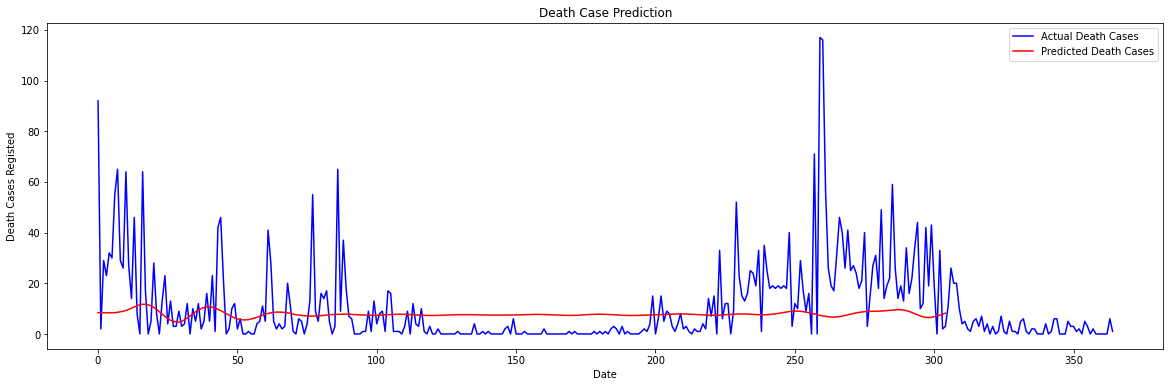

In [31]:
plt.figure(figsize=(20,6))
plt.plot(df_testing_processed, color='blue', label='Actual Death Cases')
plt.plot(predictions , color='red', label='Predicted Death Cases')
plt.title('Death Case Prediction')
plt.xlabel('Date')
plt.ylabel('Death Cases Registed')
plt.legend()
plt.show()

In [32]:
model.fit(test_features, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 542ms/step - loss: 0.0376
Epoch 2/100
10/10 [==============================] - 9s 967ms/step - loss: 0.0349
Epoch 3/100
10/10 [==============================] - 6s 587ms/step - loss: 0.0330
Epoch 4/100
10/10 [==============================] - 5s 554ms/step - loss: 0.0335
Epoch 5/100
10/10 [==============================] - 4s 466ms/step - loss: 0.0335
Epoch 6/100
10/10 [==============================] - 4s 416ms/step - loss: 0.0332
Epoch 7/100
10/10 [==============================] - 4s 361ms/step - loss: 0.0327
Epoch 8/100
10/10 [==============================] - 5s 433ms/step - loss: 0.0337
Epoch 9/100
10/10 [==============================] - 4s 424ms/step - loss: 0.0334
Epoch 10/100
10/10 [==============================] - 4s 434ms/step - loss: 0.0335
Epoch 11/100
10/10 [==============================] - 4s 404ms/step - loss: 0.0332
Epoch 12/100
10/10 [==============================] - 4s 413ms/step - loss: 0.0330
Epoch 13/100


<h2> Its 0.9669 which 96.69% </h2>

loss_val = model.evaluate(test_features,features_set)
y_pred = model.predict(test_features)
loss_val

<h2> Its 0.032 which is 96.8% accurate</h2>

<h2> Plot Val-Loss Vs Epoch </h2>

Epoch 1/100
10/10 [==============================] - 20s 457ms/step - loss: 0.0310 - val_loss: 0.0322
Epoch 2/100
10/10 [==============================] - 4s 439ms/step - loss: 0.0287 - val_loss: 0.0336
Epoch 3/100
10/10 [==============================] - 4s 419ms/step - loss: 0.0246 - val_loss: 0.0515
Epoch 4/100
10/10 [==============================] - 5s 411ms/step - loss: 0.0219 - val_loss: 0.0562
Epoch 5/100
10/10 [==============================] - 5s 441ms/step - loss: 0.0203 - val_loss: 0.0462
Epoch 6/100
10/10 [==============================] - 4s 435ms/step - loss: 0.0202 - val_loss: 0.0438
Epoch 7/100
10/10 [==============================] - 4s 426ms/step - loss: 0.0202 - val_loss: 0.0505
Epoch 8/100
10/10 [==============================] - 4s 429ms/step - loss: 0.0199 - val_loss: 0.0502
Epoch 9/100
10/10 [==============================] - 4s 422ms/step - loss: 0.0196 - val_loss: 0.0494
Epoch 10/100
10/10 [==============================] - 5s 575ms/step - loss: 0.0197 - val_l

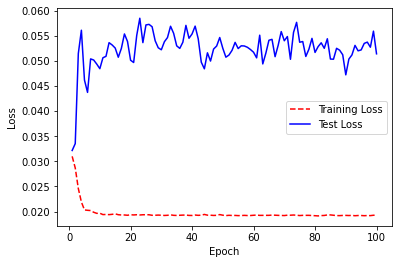

In [35]:
history = model.fit(features_set, features_set, validation_data=(test_features,features_set), batch_size=32, epochs=100, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();